In [1]:
from pyspark.sql import SparkSession

In [2]:
sparkSession = SparkSession.builder.appName("Book Analysis").getOrCreate() 

In [5]:
bookDf = sparkSession.read.csv(r"C:\Users\bedir\OneDrive\Masaüstü\Big_Data_Uygulamaları\Tavsiye Sistemleri\books\books.csv",header=True,inferSchema=True)

In [8]:
bookDf.show(5)

+---+-------+------------+-------+-----------+---------+----------------+--------------------+-------------------------+--------------------+--------------------+-------------+--------------+-------------+------------------+-----------------------+---------+---------+---------+---------+---------+--------------------+--------------------+
| id|book_id|best_book_id|work_id|books_count|     isbn|          isbn13|             authors|original_publication_year|      original_title|               title|language_code|average_rating|ratings_count|work_ratings_count|work_text_reviews_count|ratings_1|ratings_2|ratings_3|ratings_4|ratings_5|           image_url|     small_image_url|
+---+-------+------------+-------+-----------+---------+----------------+--------------------+-------------------------+--------------------+--------------------+-------------+--------------+-------------+------------------+-----------------------+---------+---------+---------+---------+---------+--------------------

In [6]:
ratingDf = sparkSession.read.csv(r"C:\Users\bedir\OneDrive\Masaüstü\Big_Data_Uygulamaları\Tavsiye Sistemleri\books\ratings.csv",header=True,inferSchema=True)

In [7]:
ratingDf.show(5)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    314|     5|
|      1|    439|     3|
|      1|    588|     5|
|      1|   1169|     4|
|      1|   1185|     4|
+-------+-------+------+
only showing top 5 rows



In [13]:
avgRatingDf = ratingDf.groupBy("book_id").avg("rating").orderBy("avg(rating)",ascending=False)

In [14]:
from pyspark.sql.functions import *

In [17]:
avgRatingDf = avgRatingDf.select("book_id",bround("avg(rating)",2)).withColumnRenamed("bround(avg(rating), 2)","rating")

In [18]:
bookDf.printSchema()

root
 |-- id: integer (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- best_book_id: integer (nullable = true)
 |-- work_id: integer (nullable = true)
 |-- books_count: integer (nullable = true)
 |-- isbn: string (nullable = true)
 |-- isbn13: double (nullable = true)
 |-- authors: string (nullable = true)
 |-- original_publication_year: double (nullable = true)
 |-- original_title: string (nullable = true)
 |-- title: string (nullable = true)
 |-- language_code: string (nullable = true)
 |-- average_rating: string (nullable = true)
 |-- ratings_count: string (nullable = true)
 |-- work_ratings_count: string (nullable = true)
 |-- work_text_reviews_count: string (nullable = true)
 |-- ratings_1: double (nullable = true)
 |-- ratings_2: integer (nullable = true)
 |-- ratings_3: integer (nullable = true)
 |-- ratings_4: integer (nullable = true)
 |-- ratings_5: integer (nullable = true)
 |-- image_url: string (nullable = true)
 |-- small_image_url: string (nullable = true)


In [19]:
titleBookDf = bookDf.select("book_id","original_title")

In [22]:
avgTitleBook = titleBookDf.join(avgRatingDf,on="book_id",how="left")

In [28]:
filteredBookDf = bookDf.filter("original_publication_year is not null AND original_title is not null ")

In [43]:
filteredDf = filteredBookDf.filter(col("original_publication_year") > 1960)


+---+--------+------------+--------+-----------+----------+----------------+--------------------+-------------------------+--------------------+--------------------+-------------+--------------+-------------+------------------+-----------------------+---------+---------+---------+---------+---------+--------------------+--------------------+
| id| book_id|best_book_id| work_id|books_count|      isbn|          isbn13|             authors|original_publication_year|      original_title|               title|language_code|average_rating|ratings_count|work_ratings_count|work_text_reviews_count|ratings_1|ratings_2|ratings_3|ratings_4|ratings_5|           image_url|     small_image_url|
+---+--------+------------+--------+-----------+----------+----------------+--------------------+-------------------------+--------------------+--------------------+-------------+--------------+-------------+------------------+-----------------------+---------+---------+---------+---------+---------+-----------

In [45]:
countDf = filteredDf.groupBy("original_publication_year").count().orderBy("original_publication_year")
countDf.show(5)

+-------------------------+-----+
|original_publication_year|count|
+-------------------------+-----+
|                   1961.0|   32|
|                   1962.0|   32|
|                   1963.0|   30|
|                   1964.0|   19|
|                   1965.0|   22|
+-------------------------+-----+
only showing top 5 rows



In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
pandas_df = countDf.toPandas()


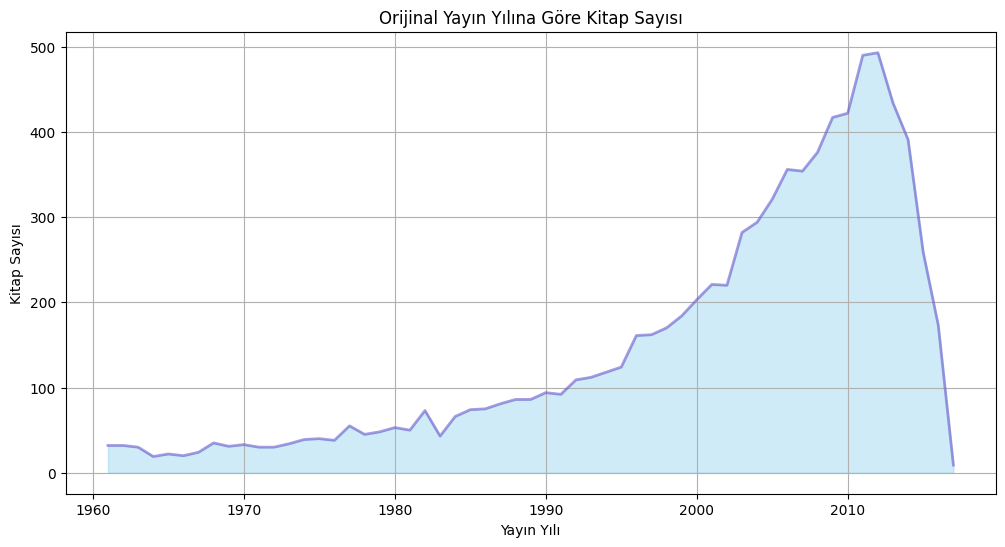

In [47]:
plt.figure(figsize=(12, 6))
plt.fill_between(pandas_df['original_publication_year'], pandas_df['count'], color='skyblue', alpha=0.4)
plt.plot(pandas_df['original_publication_year'], pandas_df['count'], color='Slateblue', alpha=0.6, linewidth=2)
plt.xlabel('Yayın Yılı')
plt.ylabel('Kitap Sayısı')
plt.title('Orijinal Yayın Yılına Göre Kitap Sayısı')
plt.grid(True)
plt.show()